In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import joblib
import warnings
warnings.filterwarnings("ignore")


In [2]:
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
data = pd.read_csv(r"C:\Users\Hp\Downloads\amazon_alexa.tsv", sep='\t')
print("Data Loaded Successfully ✅")
data.head()



Data Loaded Successfully ✅


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

data['clean_review'] = data['verified_reviews'].apply(clean_text)
data[['verified_reviews', 'clean_review']].head()



,verified_reviews,clean_review
0,Love my Echo!,love echo
1,Loved it!,loved
2,"Sometimes while playing a game, you can answer...",sometimes playing game answer question correct...
3,I have had a lot of fun with this thing. My 4 ...,lot fun thing yr old learns dinosaur control l...
4,Music,music


In [6]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['clean_review']).toarray()
y = data['feedback']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [9]:
lr = LogisticRegression(max_iter=300, class_weight='balanced')
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

svm = SVC(kernel='linear', class_weight='balanced')
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)

rf = RandomForestClassifier(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)


In [10]:
acc_lr = accuracy_score(y_test, pred_lr)
acc_svm = accuracy_score(y_test, pred_svm)
acc_rf = accuracy_score(y_test, pred_rf)

print("📊 Model Accuracies:")
print(f"Logistic Regression: {acc_lr:.4f}")
print(f"SVM: {acc_svm:.4f}")
print(f"Random Forest: {acc_rf:.4f}")

accuracies = {
    'Logistic Regression': acc_lr,
    'SVM': acc_svm,
    'Random Forest': acc_rf
}

best_model = max(accuracies, key=accuracies.get)
print(f"\n🏆 Best Model: {best_model}")


📊 Model Accuracies:
Logistic Regression: 0.9111
SVM: 0.9349
Random Forest: 0.9381

🏆 Best Model: Random Forest


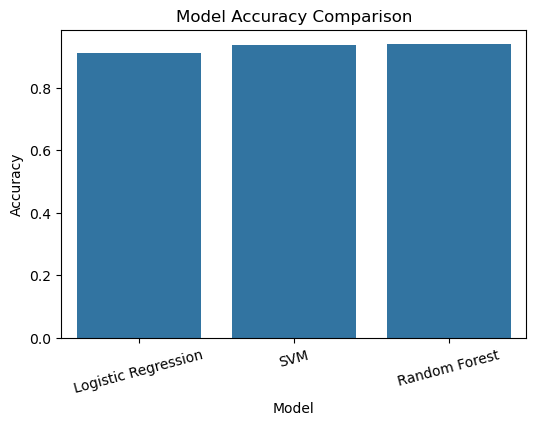

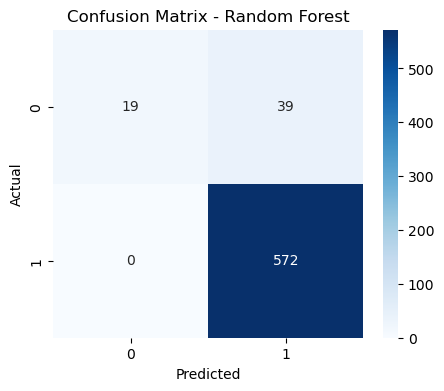

In [11]:
plt.figure(figsize=(6, 4))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=15)
plt.show()

if best_model == 'Logistic Regression':
    cm = confusion_matrix(y_test, pred_lr)
elif best_model == 'SVM':
    cm = confusion_matrix(y_test, pred_svm)
else:
    cm = confusion_matrix(y_test, pred_rf)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [12]:
print("🧾 Classification Report:")
print(classification_report(y_test, pred_lr, zero_division=0))


🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.71      0.59        58
           1       0.97      0.93      0.95       572

    accuracy                           0.91       630
   macro avg       0.74      0.82      0.77       630
weighted avg       0.93      0.91      0.92       630



In [13]:
sample_texts = [
    "I love this Alexa device, it works perfectly!",
    "Terrible product, waste of money.",
    "The sound quality is amazing and setup was easy.",
    "I am very disappointed with the response speed."
]

sample_clean = [clean_text(t) for t in sample_texts]
sample_vec = tfidf.transform(sample_clean)
sample_pred = lr.predict(sample_vec)

for text, pred in zip(sample_texts, sample_pred):
    print(f"\nReview: {text}")
    print("Sentiment:", "Positive ✅" if pred == 1 else "Negative ❌")



Review: I love this Alexa device, it works perfectly!
Sentiment: Positive ✅

Review: Terrible product, waste of money.
Sentiment: Negative ❌

Review: The sound quality is amazing and setup was easy.
Sentiment: Positive ✅

Review: I am very disappointed with the response speed.
Sentiment: Negative ❌


In [14]:
joblib.dump(lr, "sentiment_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
print("✅ Model and TF-IDF Vectorizer saved successfully.")



✅ Model and TF-IDF Vectorizer saved successfully.
